# Stratified_GridSearchCV

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

Rozważmy zbiór Breast Cancer

In [2]:
np.random.seed(1)
cancer = datasets.load_breast_cancer()
# print description
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
# get the data
X = cancer.data
y = cancer.target

Podzielmy zbiór na część testową i treningową .

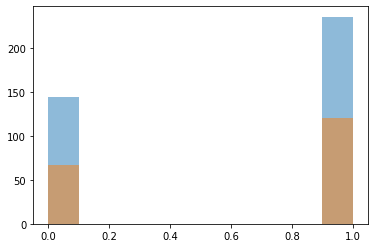

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

# Zadanie
Znajdż najleprzy model dzieląc na zbiór testowy i terningowy dla 

* SVM z jądrem rbf
* SVM z jądrem poly
* SVM liniowego
* Regresji logistycznej


In [7]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5)

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000],
              'gamma': [0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_1 = GridSearchCV(SVC(probability=True), param_grid, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

{'C': 1000000, 'gamma': 1e-07}

In [9]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

In [10]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_1.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.029425,0.001019,0.003000,0.000633,0.001,1e-08,"{'C': 0.001, 'gamma': 1e-08}",0.623377,0.618421,0.618421,...,0.619412,0.001982,61,0.618421,0.619672,0.619672,0.619672,0.619672,0.619422,0.0005
1,0.029419,0.000492,0.002802,0.000399,0.001,1e-07,"{'C': 0.001, 'gamma': 1e-07}",0.623377,0.618421,0.618421,...,0.619412,0.001982,61,0.618421,0.619672,0.619672,0.619672,0.619672,0.619422,0.0005
2,0.029826,0.000982,0.002802,0.000401,0.001,1e-06,"{'C': 0.001, 'gamma': 1e-06}",0.623377,0.618421,0.618421,...,0.619412,0.001982,61,0.618421,0.619672,0.619672,0.619672,0.619672,0.619422,0.0005
3,0.029418,0.000492,0.002605,0.000493,0.001,1e-05,"{'C': 0.001, 'gamma': 1e-05}",0.623377,0.618421,0.618421,...,0.619412,0.001982,61,0.618421,0.619672,0.619672,0.619672,0.619672,0.619422,0.0005
4,0.030824,0.000401,0.002802,0.000400,0.001,0.0001,"{'C': 0.001, 'gamma': 0.0001}",0.623377,0.618421,0.618421,...,0.619412,0.001982,61,0.618421,0.619672,0.619672,0.619672,0.619672,0.619422,0.0005


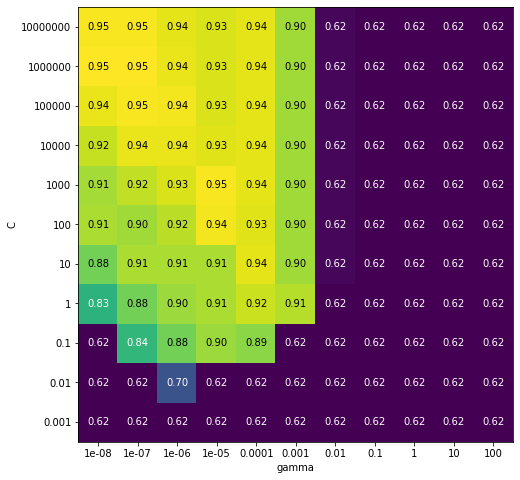

In [11]:
fig = plt.figure(figsize=(8, 8))

scores = np.array(results.mean_test_score).reshape(11,11)
# plot the mean cross-validation scores
heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
plt.show()

In [63]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_2 = GridSearchCV(SVC(kernel="linear", probability=True), param_grid, cv=kfold)

grid_2.fit(X_train, y_train)
grid_2.best_params_

{'C': 100}

In [64]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 200, 300, 400],
             'penalty': ['l1', 'l2']}

grid_3 = GridSearchCV(LogisticRegression(), param_grid, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
grid_3.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL

{'C': 400, 'penalty': 'l2'}

In [82]:
from sklearn.ensemble import RandomForestClassifier


param_grid_4 = {'n_estimators': [10, 50, 100],
                'max_features': ["auto", "sqrt", "log2"],
                'max_leaf_nodes': [10, 20, 100, 200],
                'max_depth': [10, 20]
             }

grid_4 = GridSearchCV(RandomForestClassifier(), param_grid_4, cv=kfold, return_train_score=True)

grid_4.fit(X_train, y_train)
grid_4.best_params_

{'max_depth': 20,
 'max_features': 'log2',
 'max_leaf_nodes': 100,
 'n_estimators': 100}

In [113]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


param_grid_5 = {'n_estimators': [10,50,100, 200],
              'max_samples': [10,20, 100, 200]
             }

grid_5 = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(random_state=42), 
                                        n_estimators=500,
                                        max_samples=100, 
                                        bootstrap=True, 
                                        random_state=42),
                      param_grid_5, cv=kfold, return_train_score=True)

grid_5.fit(X_train, y_train)
grid_5.best_params_

{'max_samples': 200, 'n_estimators': 50}

In [125]:
from sklearn.ensemble import ExtraTreesClassifier


param_grid_6 = {'n_estimators': [10, 50, 100],
                'max_features': ["auto", "sqrt", "log2"],
                'max_leaf_nodes': [10, 20, 100, 200],
                'max_depth': [10, 20]
             }

grid_6 = GridSearchCV(ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16), param_grid_6, cv=kfold, return_train_score=True)

grid_6.fit(X_train, y_train)
grid_6.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'max_leaf_nodes': 100,
 'n_estimators': 50}

In [147]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier



param_grid_7 = {'n_estimators': [50, 100, 200, 300],
              'learning_rate': [0.1, 0.2,0.5, 0.9, 1],
              'base_estimator__min_samples_leaf':[1, 10, 100],
              'base_estimator__max_depth':[1, 10, 20, 30]
             }

grid_7 = GridSearchCV(AdaBoostClassifier(
                        DecisionTreeClassifier(max_depth=1), 
                        n_estimators=1, learning_rate=0.5, 
                        algorithm="SAMME.R", random_state=42), 
                      param_grid_7, 
                      cv=kfold, 
                      return_train_score=True)

grid_7.fit(X_train, y_train)
grid_7.best_params_

{'base_estimator__max_depth': 10,
 'base_estimator__min_samples_leaf': 10,
 'learning_rate': 0.5,
 'n_estimators': 200}

In [148]:
# grid_7.estimator.get_params().keys()

In [157]:
from sklearn.ensemble import GradientBoostingClassifier


param_grid_8 = {'n_estimators': [50, 100, 200, 300],
              'learning_rate': [0.1, 0.2,0.5, 0.9, 1],
              'min_samples_leaf':[1, 10, 100],
              'max_depth':[1, 10, 20, 30]
             }

grid_8 = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_8, cv=kfold, return_train_score=True)

grid_8.fit(X_train, y_train)
grid_8.best_params_

{'learning_rate': 0.9,
 'max_depth': 10,
 'min_samples_leaf': 100,
 'n_estimators': 100}

In [163]:
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None


param_grid_9 = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.1, 0.2,0.5,0.9, 1]
             }

grid_9 = GridSearchCV(xgboost.XGBClassifier(n_estimators=1, 
                      learning_rate=0.5, 
                      random_state=42), param_grid_9, cv=kfold, return_train_score=True)

grid_9.fit(X_train, y_train)
grid_9.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [173]:
from scipy.stats.distributions import uniform, randint
param_grid = {
    'max_depth': [3, 5, 8, 10],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 150, 200, 400],
    'gamma': [0, 0.5, 1, 2],
    'colsample_bytree': [1, 0.8, 0.5],
    'subsample': [1, 0.8, 0.5],
    'min_child_weight': [1, 5, 10]
}

param_distribution = {
    'max_depth': randint(3, 11),
    'learning_rate': uniform(0.001, 0.1-0.001),
    'n_estimators': randint(50, 400),
    'gamma': uniform(0,2),
    'colsample_bytree': uniform(0.5, 0.5),
    'subsample': uniform(0.5, 0.5),
    'min_child_weight': randint(1, 11)
}


In [181]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier

randomized_grid_search = RandomizedSearchCV(
    n_iter=300, estimator=XGBClassifier(n_jobs=-1), 
    cv=kfold, 
    param_distributions=param_grid,
    return_train_score=True
)

randomized_grid_search.fit(X_train, y_train)
randomized_grid_search.best_params_

{'subsample': 0.5,
 'n_estimators': 100,
 'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.05,
 'gamma': 0,
 'colsample_bytree': 0.5}

In [182]:
randomized_grid_search_1 = RandomizedSearchCV(
    n_iter=300, estimator=XGBClassifier(n_jobs=-1), 
    cv=kfold, 
    param_distributions=param_distribution,
    return_train_score=True
)

randomized_grid_search_1.fit(X_train, y_train)
randomized_grid_search_1.best_params_

{'colsample_bytree': 0.7277653906093529,
 'gamma': 0.47392862704754224,
 'learning_rate': 0.08560071962494038,
 'max_depth': 3,
 'min_child_weight': 2,
 'n_estimators': 173,
 'subsample': 0.6234016201302632}

In [195]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('grid_1', grid_1.best_estimator_),
#                 ('grid_2', grid_2.best_estimator_), 
#                 ('grid_3', grid_3.best_estimator_), 
                ('grid_4', grid_4.best_estimator_),
#                 ('grid_10', randomized_grid_search.best_estimator_),
                ('grid_11', randomized_grid_search_1.best_estimator_),
               ],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('grid_1',
                              SVC(C=1000000, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma=1e-07, kernel='rbf', max_iter=-1,
                                  probability=True, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False)),
                             ('grid_4',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     crite...
                                            learning_rate=0.08560071962494038,
                                            max_delta_step=0, max_depth=3,
                                            min_child_

In [196]:
from sklearn import  metrics


models = []
models.append(('SVM rbf', grid_1.best_estimator_))
models.append(('SVM linear', grid_2.best_estimator_))
models.append(('Logistic regresion', grid_3.best_estimator_))
models.append(('RF', grid_4.best_estimator_))
models.append(('Bagging', grid_5.best_estimator_))
models.append(('Extr tree', grid_6.best_estimator_))
models.append(('AdaBoost', grid_7.best_estimator_))
models.append(('GradientBoosting', grid_8.best_estimator_))
models.append(('xgboost', grid_9.best_estimator_))
models.append(('xgboost rand', randomized_grid_search.best_estimator_))
models.append(('xgboost rand1', randomized_grid_search_1.best_estimator_))


models.append(('voting_clf', voting_clf)) 

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
auc_score = []

for name, model in models:
    print(name)
    print("R^2: {}".format(metrics.precision_score(y_test, model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test)) ))
    print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]) ))
    
    
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test, model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test))) 
    auc_score.append( metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]) ) 
    

SVM rbf
R^2: 0.959349593495935
recall_score: 0.9752066115702479
f1_score: 0.9672131147540983
accuracy_score: 0.9574468085106383
roc_auc_score: 0.9970395954113728
SVM linear
R^2: 0.9663865546218487
recall_score: 0.9504132231404959
f1_score: 0.9583333333333334
accuracy_score: 0.9468085106382979
roc_auc_score: 0.9856913778216355
Logistic regresion
R^2: 0.959349593495935
recall_score: 0.9752066115702479
f1_score: 0.9672131147540983
accuracy_score: 0.9574468085106383
roc_auc_score: 0.9932157394843962
RF
R^2: 0.959349593495935
recall_score: 0.9752066115702479
f1_score: 0.9672131147540983
accuracy_score: 0.9574468085106383
roc_auc_score: 0.9965461946466018
Bagging
R^2: 0.9504132231404959
recall_score: 0.9504132231404959
f1_score: 0.9504132231404959
accuracy_score: 0.9361702127659575
roc_auc_score: 0.9911187862341186
Extr tree
R^2: 0.967479674796748
recall_score: 0.9834710743801653
f1_score: 0.9754098360655739
accuracy_score: 0.9680851063829787
roc_auc_score: 0.9969162452201802
AdaBoost
R^2: 0

In [197]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'auc_score' : auc_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['SVM rbf', 'SVM linear', 'Logistic regression', 'RF', "Bagging", 'Extr tree', "AdaBoost", "GradientBoosting", "xgboost", 'xgboost rand', 'xgboost rand 1', 'voting'])
df

,Method,precision_score,recall_score,f1_score,accuracy_score,auc_score
0,SVM rbf,0.959350,0.975207,0.967213,0.957447,0.997040
1,SVM linear,0.966387,0.950413,0.958333,0.946809,0.985691
2,Logistic regression,0.959350,0.975207,0.967213,0.957447,0.993216
3,RF,0.959350,0.975207,0.967213,0.957447,0.996546
4,Bagging,0.950413,0.950413,0.950413,0.936170,0.991119
5,Extr tree,0.967480,0.983471,0.975410,0.968085,0.996916
6,AdaBoost,0.967213,0.975207,0.971193,0.962766,0.992969
7,GradientBoosting,0.991597,0.975207,0.983333,0.978723,0.992846
8,xgboost,0.967480,0.983471,0.975410,0.968085,0.995189
9,xgboost rand,0.951613,0.975207,0.963265,0.952128,0.995066


SVM rbf
SVM linear
Logistic regresion
RF
Bagging
Extr tree
AdaBoost
GradientBoosting
xgboost
xgboost rand
xgboost rand1
voting_clf


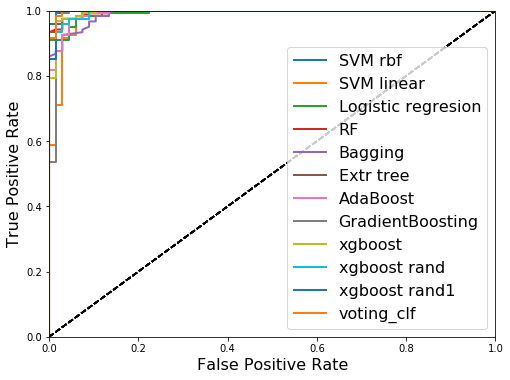

In [198]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
for name, model in models:
    print(name)
    y_scores = model.predict_proba(X_test)[:,1]        
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    plot_roc_curve(fpr, tpr, name)

plt.legend(loc="lower right", fontsize=16)
plt.show()

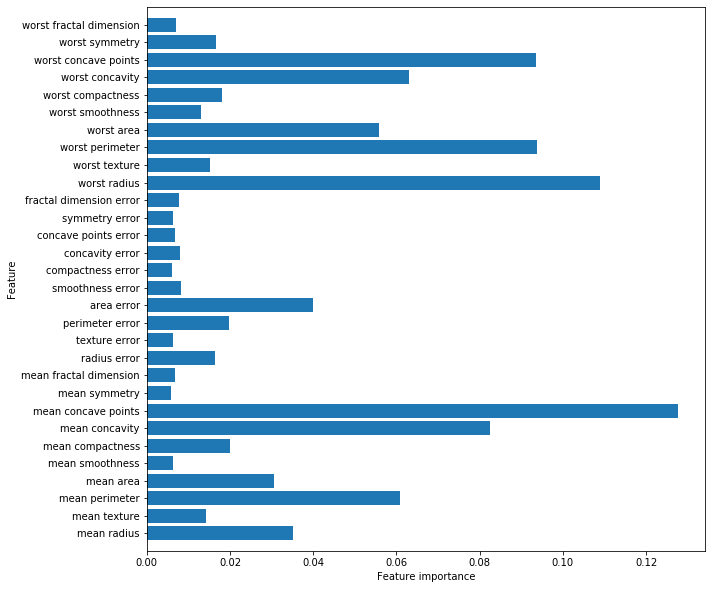

In [123]:
def plot_feature_importances(model, data):
    n_features = data.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plt.figure(figsize=(10, 10))
plot_feature_importances(grid_4.best_estimator_, cancer)    

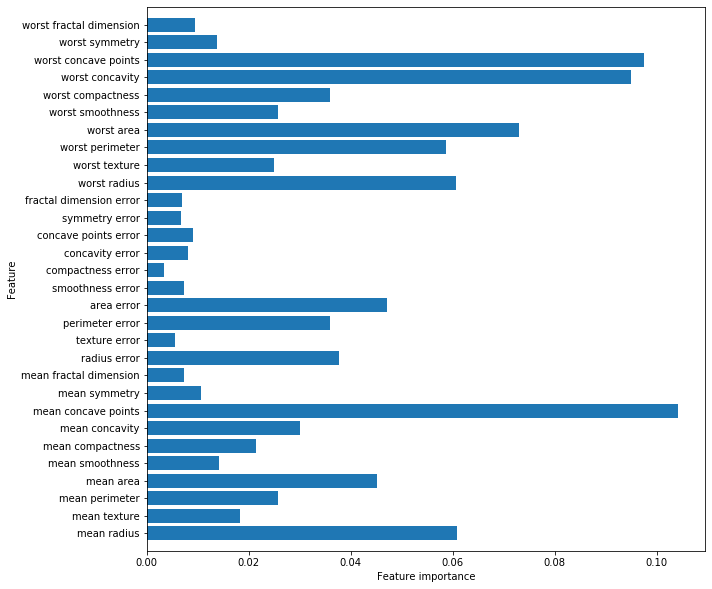

In [129]:
plt.figure(figsize=(10, 10))
plot_feature_importances(grid_6.best_estimator_, cancer) 

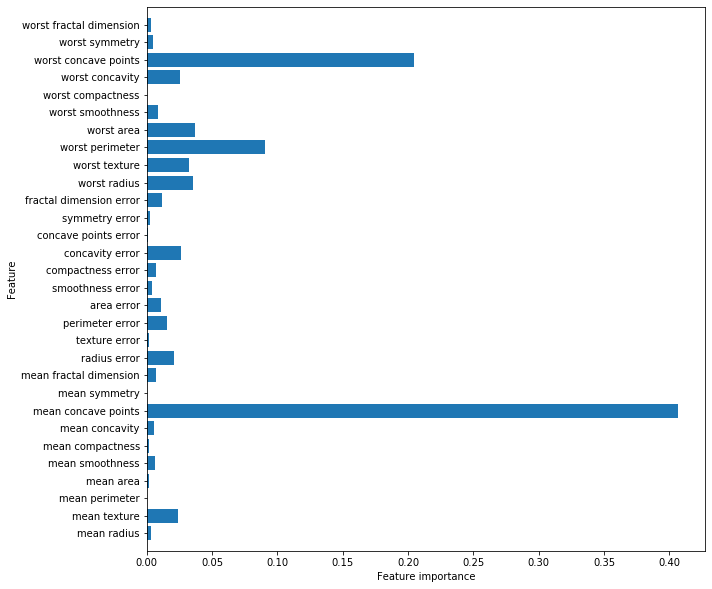

In [167]:
plt.figure(figsize=(10, 10))
plot_feature_importances(grid_9.best_estimator_, cancer)

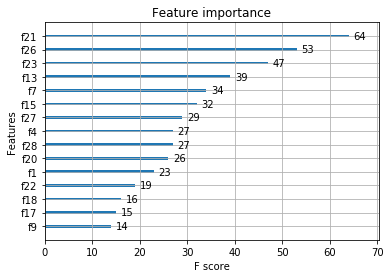

In [170]:

from xgboost import plot_importance
plot_importance(booster=grid_9.best_estimator_, max_num_features=15, importance_type='weight')#, ylabel=wine.feature_names )
plt.show()